The data we are using is from Udacity. Udacity, Inc. is a for-profit educational organization founded by Sebastian Thrun, David Stavens, and Mike Sokolsky offering massive open online courses.

The data are stored in 3 files located in `./data/`. The file names are `enrollments.csv`, `daily_engagement.csv` and `project_submissions.csv`

Here are some questions we would like to answer based on the data in hand:
- How long to submit projects?
- How do students who pass their project differ from those who don't?
- You may have other questions, so let me know ...

Take a look at the data and think of at least 5 questions you can answer using it.

1. How time time the students spend taking class on Udacity?
2. How time spent related to the number of lessons or projects completed?
3. How student engagement changes over time?
4. How many times students submit project before they pass?
5. etc.


## Load Data from CSVs

In [69]:
import unicodecsv
import pandas as pd
with open('enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)
enrollments

[OrderedDict([('account_key', '448'),
              ('status', 'canceled'),
              ('join_date', '2014-11-10'),
              ('cancel_date', '2015-01-14'),
              ('days_to_cancel', '65'),
              ('is_udacity', 'True'),
              ('is_canceled', 'True')]),
 OrderedDict([('account_key', '448'),
              ('status', 'canceled'),
              ('join_date', '2014-11-05'),
              ('cancel_date', '2014-11-10'),
              ('days_to_cancel', '5'),
              ('is_udacity', 'True'),
              ('is_canceled', 'True')]),
 OrderedDict([('account_key', '448'),
              ('status', 'canceled'),
              ('join_date', '2015-01-27'),
              ('cancel_date', '2015-01-27'),
              ('days_to_cancel', '0'),
              ('is_udacity', 'True'),
              ('is_canceled', 'True')]),
 OrderedDict([('account_key', '448'),
              ('status', 'canceled'),
              ('join_date', '2014-11-10'),
              ('cancel_date', '201

In [70]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.
with open('daily_engagement.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    daily_engagement = list(reader)
# update with your code
daily_engagement
with open('project_submissions.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    project_submissions = list(reader)
# project_submissions # update with your code



In [71]:
# Do not change these lines
from collections import OrderedDict
print("Correct Answer") if daily_engagement[1] == OrderedDict([('acct', '0'), ('utc_date', '2015-01-10'), ('num_courses_visited', '2.0'), ('total_minutes_visited', '37.2848873333'), ('lessons_completed', '0.0'), ('projects_completed', '0.0')]) else print("Wrong Answer")
print("Correct Answer") if project_submissions[0] == OrderedDict([('creation_date', '2015-01-14'),('completion_date', '2015-01-16'),('assigned_rating', 'UNGRADED'),('account_key', '256'),('lesson_key', '3176718735'),('processing_state', 'EVALUATED')]) else print("Wrong Answer")

Wrong Answer
Correct Answer


## Fixing Data Types

After understand the data, you may want to select the parts of the data that you plan to use and check their types. From the enrollments data, we have the following
'account_key', 'status','join_date', 'cancel_date','days_to_cancel','is_udacity','is_canceled'


In [72]:
print(enrollments[0]['cancel_date'])
print(enrollments[0]['days_to_cancel'])
print(enrollments[0]['is_canceled'])
print(enrollments[0]['is_udacity'])
print(enrollments[0]['join_date'])

2015-01-14
65
True
True
2014-11-10


In [73]:
print(type(enrollments[0]['cancel_date']))
print(type(enrollments[0]['days_to_cancel']))
print(type(enrollments[0]['is_canceled']))
print(type(enrollments[0]['is_udacity']))
print(type(enrollments[0]['join_date']))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


The datatypes are all str, although you have "2015-01-14" which could a date, "65" which could be an int and "True" which could be a Boolean value. Fixing these types will allow us to better maniipulate the data later on.

In [74]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    


In [75]:
for enrollment in enrollments:
    print(enrollment)

OrderedDict([('account_key', '448'), ('status', 'canceled'), ('join_date', datetime.datetime(2014, 11, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 1, 14, 0, 0)), ('days_to_cancel', 65), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '448'), ('status', 'canceled'), ('join_date', datetime.datetime(2014, 11, 5, 0, 0)), ('cancel_date', datetime.datetime(2014, 11, 10, 0, 0)), ('days_to_cancel', 5), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '448'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 1, 27, 0, 0)), ('cancel_date', datetime.datetime(2015, 1, 27, 0, 0)), ('days_to_cancel', 0), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '448'), ('status', 'canceled'), ('join_date', datetime.datetime(2014, 11, 10, 0, 0)), ('cancel_date', datetime.datetime(2014, 11, 10, 0, 0)), ('days_to_cancel', 0), ('is_udacity', True), ('is_canceled', True)])
OrderedDict([('account_key', '448'), ('stat

OrderedDict([('account_key', '1227'), ('status', 'current'), ('join_date', datetime.datetime(2015, 6, 9, 0, 0)), ('cancel_date', None), ('days_to_cancel', None), ('is_udacity', False), ('is_canceled', False)])
OrderedDict([('account_key', '176'), ('status', 'current'), ('join_date', datetime.datetime(2015, 7, 8, 0, 0)), ('cancel_date', None), ('days_to_cancel', None), ('is_udacity', False), ('is_canceled', False)])
OrderedDict([('account_key', '1133'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 7, 9, 0, 0)), ('cancel_date', datetime.datetime(2015, 7, 15, 0, 0)), ('days_to_cancel', 6), ('is_udacity', False), ('is_canceled', True)])
OrderedDict([('account_key', '1231'), ('status', 'current'), ('join_date', datetime.datetime(2015, 7, 9, 0, 0)), ('cancel_date', None), ('days_to_cancel', None), ('is_udacity', False), ('is_canceled', False)])
OrderedDict([('account_key', '1005'), ('status', 'canceled'), ('join_date', datetime.datetime(2015, 7, 9, 0, 0)), ('cancel_date', da

In [76]:
print(enrollments[0]['cancel_date'])
print(enrollments[0]['days_to_cancel'])
print(enrollments[0]['is_canceled'])
print(enrollments[0]['is_udacity'])
print(enrollments[0]['join_date'])

2015-01-14 00:00:00
65
True
True
2014-11-10 00:00:00


In [77]:
print(type(enrollments[0]['cancel_date']))
print(type(enrollments[0]['days_to_cancel']))
print(type(enrollments[0]['is_canceled']))
print(type(enrollments[0]['is_udacity']))
print(type(enrollments[0]['join_date']))

<class 'datetime.datetime'>
<class 'int'>
<class 'bool'>
<class 'bool'>
<class 'datetime.datetime'>


In [78]:
# Check the the engagement table
daily_engagement[0]

OrderedDict([('acct', '0'),
             ('utc_date', '2015/1/9'),
             ('num_courses_visited', '1'),
             ('total_minutes_visited', '11.6793745'),
             ('lessons_completed', '0'),
             ('projects_completed', '0')])

In [79]:
# Check further the elements that will later be used
print(daily_engagement[0]['lessons_completed'])
print(daily_engagement[0]['num_courses_visited'])
print(daily_engagement[0]['projects_completed'])
print(daily_engagement[0]['total_minutes_visited'])
print(daily_engagement[0]['utc_date'])

0
1
0
11.6793745
2015/1/9


In [80]:
# Check the types of the elements that will be used later
print(type(daily_engagement[0]['lessons_completed']))
print(type(daily_engagement[0]['num_courses_visited']))
print(type(daily_engagement[0]['projects_completed']))
print(type(daily_engagement[0]['total_minutes_visited']))
print(type(daily_engagement[0]['utc_date']))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [81]:
#####################################
#                 2                 #
#####################################
# Clean up the data types in the engagement table (update the types to what is needed)

# lessons_completed type should be <class 'int'>
# num_courses_visited type should be <class 'int'>
# projects_completed type should be  <class 'int'>
# total_minutes_visited type should be  <class 'float'>
# utc_date type should be  <class 'datetime.datetime'>

# Update the code below
from datetime import datetime as dt

def parse_date(date):
    if date=='':
        return None
    else:
        return dt.strptime(date,'%Y/%m/%d')

def parse_int(i):
    if i=='':
        return None
    else:
        return int(float(i))
    
def parse_float(i):
    if i=='':
        return None
    else:
        return float(i)

for each_daily_engagement in daily_engagement:
    each_daily_engagement['lessons_completed']=parse_int(each_daily_engagement['lessons_completed'])
    each_daily_engagement['num_courses_visited']=parse_int(each_daily_engagement['num_courses_visited'])
    each_daily_engagement['projects_completed']=parse_int(each_daily_engagement['projects_completed'])
    each_daily_engagement['total_minutes_visited']=parse_float(each_daily_engagement['total_minutes_visited'])
    each_daily_engagement['utc_date']=parse_date(each_daily_engagement['utc_date'])





In [82]:
# Do not change the code in this cell

print("lessons_completed type is correct!") if str(type(daily_engagement[0]['lessons_completed'])) == "<class 'int'>" else print("Wrong!!", type(daily_engagement[0]['lessons_completed']))
print("num_courses_visited type is correct!") if str(type(daily_engagement[0]['num_courses_visited'])) == "<class 'int'>" else print("Wrong!!", type(daily_engagement[0]['lessons_completed']))
print("projects_completed type is correct!") if str(type(daily_engagement[0]['projects_completed'])) == "<class 'int'>" else print("Wrong!!", type(daily_engagement[0]['lessons_completed']))
print("total_minutes_visited type is correct!") if str(type(daily_engagement[0]['total_minutes_visited'])) == "<class 'float'>" else print("Wrong!!", type(daily_engagement[0]['lessons_completed']))
print("utc_date type is correct!") if str(type(daily_engagement[0]['utc_date'])) == "<class 'datetime.datetime'>" else print("Wrong!!", type(daily_engagement[0]['lessons_completed']))


lessons_completed type is correct!
num_courses_visited type is correct!
projects_completed type is correct!
total_minutes_visited type is correct!
utc_date type is correct!


In [83]:
# Clean up the data types in the submissions table
def parse_date(date):
    if date=='':
        return None
    else:
        return dt.strptime(date,'%Y-%m-%d')
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

OrderedDict([('creation_date', datetime.datetime(2015, 1, 14, 0, 0)),
             ('completion_date', datetime.datetime(2015, 1, 16, 0, 0)),
             ('assigned_rating', 'UNGRADED'),
             ('account_key', '256'),
             ('lesson_key', '3176718735'),
             ('processing_state', 'EVALUATED')])

## Great Job! 
What you have done so far is called data wrangling process. Which againi are: loading the data and making sure it's in a good format. 

The next step is to investigate a bit and see if there are any inconsistencies or problems in the data that you'll need to clean up.

For each of the three files you've loaded, find the total number of rows in the csv and the number of unique students. To find the number of unique students in each table, you might want to try creating a set of the account keys.


## Investigating the Data

In [84]:
#####################################
#                 3                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.
enrollment_num_rows = len(enrollments) # Replace this with your co

acount_enrollment=set()
for enrollment in enrollments:
    acount_enrollment.add(enrollment['account_key'])
    
enrollment_num_unique_students =len(acount_enrollment)   # Replace this with your code

engagement_num_rows = len(daily_engagement)  # Replace this with your code

acount_engagament=set()
for each in daily_engagement:
    acount_engagament.add(each['acct'])
    
engagement_num_unique_students = len(acount_engagament) # Replace this with your code

acount_submission=set()
submission_num_rows = len(project_submissions)# Replace this with your code
for each in project_submissions:
    acount_submission.add(each["account_key"])
submission_num_unique_students = len(acount_submission) # Replace this with your code
len(acount_submission)

743

In [85]:
# D o not modifiy anything from this sell
a = True if enrollment_num_rows == 1640 else False
b = True if enrollment_num_unique_students == 1302 else False
c = True if engagement_num_rows == 136240 else False
d = True if engagement_num_unique_students == 1237 else False
e = True if submission_num_rows == 3642 else False
f = True if submission_num_unique_students == 743 else False


message = '''
That's correct! But why are there students who enroll but never have any engagement data?

Looks good! If you haven't already, try printing out each of those numbers to
see what they are.'''
print(message) if a & b & c & d & e & f == True else print('\nSomething is wrong with your answer, please try again!\n')
    



That's correct! But why are there students who enroll but never have any engagement data?

Looks good! If you haven't already, try printing out each of those numbers to
see what they are.


## Problems in the Data

1. Why are there more students in the enrollment table than the engagement table?
2. In the `daily_engagement` the row that contains the student account key is named `acct`. To keep everything the same, it good to have it modified and renamed `account_key` like the account key in the other two files.




In [86]:
#####################################
#                 4                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".
s=daily_engagement.copy
for line in daily_engagement:
    line["account_key"]=line.pop("acct")
daily_engagement[0]['account_key']


'0'

In [87]:
# Do not change the content of this cell
print('Well done!') if daily_engagement[0]['account_key'] == '0' else print("Please try again!")

Well done!


Now you can easily create a function for getting the unique students that can be used for all 3 xml files.


In [88]:
#####################################
#                 5                 #
#####################################

# Create a function that can be used for for getting the list of the unique students
# We will consider that the previous wrangling and processing were completed and the scripts were all run.
def get_unique_students(data):
    unique_students=set()
    for data_point in data:
        unique_students.add(data_point["account_key"])
    return unique_students
   

In [89]:
# Do not modify the content of this cell
b = True if len(get_unique_students(enrollments)) == 1302 else False
d = True if len(get_unique_students(daily_engagement)) == 1237 else False
f = True if len(get_unique_students(project_submissions)) == 743 else False

message = '''
That's correct! But why are there students who enroll but never have any engagement data?

Looks good! If you haven't already, try printing out each of those numbers to
see what they are.'''           
print(message) if b & d & f == True else print('\nSomething is wrong with your answer, please try again!\n')
    


That's correct! But why are there students who enroll but never have any engagement data?

Looks good! If you haven't already, try printing out each of those numbers to
see what they are.


In [90]:
for row in enrollments:
    if row["account_key"] not in get_unique_students(daily_engagement):
        print(row)
        break

OrderedDict([('account_key', '1219'), ('status', 'canceled'), ('join_date', datetime.datetime(2014, 11, 12, 0, 0)), ('cancel_date', datetime.datetime(2014, 11, 12, 0, 0)), ('days_to_cancel', 0), ('is_udacity', False), ('is_canceled', True)])


In [91]:
list_surprsing=list()
for row in enrollments:
    if row["account_key"] not in get_unique_students(daily_engagement):
        list_surprsing.append(row)
    
print(len(list_surprsing),enrollments[0])

71 OrderedDict([('account_key', '448'), ('status', 'canceled'), ('join_date', datetime.datetime(2014, 11, 10, 0, 0)), ('cancel_date', datetime.datetime(2015, 1, 14, 0, 0)), ('days_to_cancel', 65), ('is_udacity', True), ('is_canceled', True)])


In [92]:
list_surpring_stayed_enrolled_at_least_one_day=list()
for row in enrollments:
    if row['account_key'] not in get_unique_students(daily_engagement):
        if row['days_to_cancel']!=0:
            list_surpring_stayed_enrolled_at_least_one_day.append(row)
len(list_surpring_stayed_enrolled_at_least_one_day)

3

In [93]:
udacity_test_accounts=set()
for enrollment in enrollments:
    if enrollment["is_udacity"]:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [94]:

def remove_udacity_accounts(data):
    non_udacity_data = []
    # Your code below
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)

    # Your code below
    return non_udacity_data

non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print ("Before: ", len(enrollments), "and After: ",len(non_udacity_enrollments), " the difference is: ", len(enrollments) - len(non_udacity_enrollments))
print ("Before: ", len(daily_engagement), "and After: ",len(non_udacity_engagement), " the difference is: ", len(daily_engagement)-len(non_udacity_engagement))
print ("Before: ", len(project_submissions), "and After: ",len(non_udacity_submissions), " the difference is: ", len(project_submissions) - len(non_udacity_submissions))

Before:  1640 and After:  1622  the difference is:  18
Before:  136240 and After:  135656  the difference is:  584
Before:  3642 and After:  3634  the difference is:  8


In [95]:
paid_students = dict()

# write your code here
for row in non_udacity_enrollments:
    if not row["is_canceled"] or row["days_to_cancel"] > 7:
        paid_students[row['account_key']] = row['join_date']
        

# END write your code here

print('Your answer is ', len(paid_students), ' and the correct answer is 995')

Your answer is  995  and the correct answer is 995


In [96]:
paid_students=dict()
for row in non_udacity_enrollments:
    if not row["is_canceled"] or row["days_to_cancel"] > 7:
        if paid_students.__contains__('account_key'):
            if paid_students['account_key']<row['join_date']:
                paid_students[row['account_key']] = row['join_date']
                break
        paid_students[row['account_key']] = row['join_date']
len(paid_students)
def remove_free_trial_cancels(data):
    new_data = list()
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data
paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)
print(len(paid_enrollments))
print(len(paid_engagement))
print(len(paid_submissions))

1293
134549
3618


In [97]:
paid_engagement_in_first_week = list()
for row in non_udacity_engagement:
    if row['account_key'] in paid_students.keys() and (row['utc_date'] - paid_students.get(row['account_key'])).days < 7 :

        paid_engagement_in_first_week.append(row)

number_of_rows_that_meet_this_criteria = len(paid_engagement_in_first_week)

print("That is correct but ... we can discuss this!") if number_of_rows_that_meet_this_criteria == 21508 else print("So, your answer is ", number_of_rows_that_meet_this_criteria)
print("You got it right") if number_of_rows_that_meet_this_criteria == 6919 else print("The expected correct answer is: ", number_of_rows_that_meet_this_criteria)
# for row in non_udacity_enrollments:
#     if row['']

So, your answer is  17210
The expected correct answer is:  17210


In [98]:
paid_engagement_in_first_week = list()
for row in non_udacity_engagement:
    if row['account_key'] in paid_students.keys() and (row['utc_date'] - paid_students.get(row['account_key'])).days < 7 and (row['utc_date'] - paid_students.get(row['account_key'])).days >= 0 :
    

        paid_engagement_in_first_week.append(row)

number_of_rows_that_meet_this_criteria = len(paid_engagement_in_first_week)

print("That is correct but ... we can discuss this!") if number_of_rows_that_meet_this_criteria == 21508 else print("So, your answer is ", number_of_rows_that_meet_this_criteria)
print("You got it right") if number_of_rows_that_meet_this_criteria == 6919 else print("The expected correct answer is: ", number_of_rows_that_meet_this_criteria)

So, your answer is  6920
The expected correct answer is:  6920


In [99]:
paid_engagement_in_first_week = list()
for row in non_udacity_engagement:
    if row['account_key'] in paid_students.keys() and (row['utc_date'] - paid_students.get(row['account_key'])).days < 7 and (row['utc_date'] - paid_students.get(row['account_key'])).days >= 0 :
    

        paid_engagement_in_first_week.append(row)

number_of_rows_that_meet_this_criteria = len(paid_engagement_in_first_week)

print("That is correct but ... we can discuss this!") if number_of_rows_that_meet_this_criteria == 21508 else print("So, your answer is ", number_of_rows_that_meet_this_criteria)
print("You got it right") if number_of_rows_that_meet_this_criteria == 6919 else print("The expected correct answer is: ", number_of_rows_that_meet_this_criteria)


So, your answer is  6920
The expected correct answer is:  6920


In [100]:
 from collections import defaultdict
engagement_by_account=defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)
total_minutes_by_account={}

for account_key,engagement_for_student in engagement_by_account.items():
    total_minutes=0
    for engagement_record in engagement_for_student:
        total_minutes +=engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key]=total_minutes

In [101]:
import numpy as np

# Summarize the data about minutes spent in the classroom
total_minutes = total_minutes_by_account.values()
print ('Mean:', np.mean(list(total_minutes)))
print ('Standard deviation:', np.std(list(total_minutes)))
print ('Minimum:', np.min(list(total_minutes)))
print ('Maximum:', np.max(list(total_minutes)))

Mean: 305.41471890738194
Standard deviation: 405.91261032134884
Minimum: 0.0
Maximum: 3564.7332645


## count the lessons compeleted

In [102]:
all_lessons_compeleted_by_account=defaultdict(list)
for engagement in paid_engagement_in_first_week:
    account_key=engagement['account_key']
    all_lessons_compeleted_by_account[account_key].append(engagement['lessons_completed'])

#  sum_total_lessons_compeleted_by_account={account_key:sum(lessons_compeleted_by_account) for account_key,lessons_compeleted_by_account in all_lessons_compeleted_by_account.items()}
sum_total_lessons_compeleted_by_account = {account_key:sum(lessons_completed_by_account) for account_key, lessons_completed_by_account in all_lessons_compeleted_by_account.items()}
print("the number of lessons completed by each student during the first week")
all_students_lessons_completed=sum_total_lessons_compeleted_by_account.values()

print('mean:',np.mean(list(all_students_lessons_completed)))
print('standard deviation:',np.std(list(all_students_lessons_completed)))
print('minimum:',np.min(list(all_students_lessons_completed)))
print('Maximum:',np.max(list(all_students_lessons_completed)))

the number of lessons completed by each student during the first week
mean: 1.6321608040201006
standard deviation: 3.0014018256251003
minimum: 0
Maximum: 36


In [103]:
def group_by_account_key(data,value_need):
    from collections import defaultdict
    group=defaultdict(list)
    for data_point in data:
        account_key=data_point['account_key']
        group[account_key].append(data_point[value_need])
    return group

def group_sum(group):
    sum_={account_key:sum(values) for account_key,values in group.items()}
    return sum_

def report(group_sum,title):
    values=group_sum.values()
    print(title)
    print ('Mean:', np.mean(list(values)))
    print ('Standard deviation:', np.std(list(values)))
    print ('Minimum:', np.min(list(values)))
    print ('Maximum:', np.max(list(values)))
    print("\n")

In [104]:
group_by_account=group_by_account_key(paid_engagement_in_first_week,'lessons_completed')
group_sum_=group_sum(group_by_account)

report(group_sum_,'total project completed')

total project completed
Mean: 1.6321608040201006
Standard deviation: 3.0014018256251003
Minimum: 0
Maximum: 36




# count the the days visited the classroom

In [105]:
import copy
group_by_account_=group_by_account_key(paid_engagement_in_first_week,'num_courses_visited')
group_by_account_bool=copy.deepcopy(group_by_account_)
for index,my_list in group_by_account_.items():
    array=np.asarray(my_list)
    my_bool_array=array>0
    my_bool_list=list(my_bool_array)
    group_by_account_bool[index]=sum(my_bool_list)
report(group_by_account_bool,'number days each student visits the classroom')

number days each student visits the classroom
Mean: 2.912562814070352
Standard deviation: 2.22037005490701
Minimum: 0
Maximum: 7




# Two list of who pass the subway project and who do not

In [106]:
subway_project_lesson_keys = ['746169184', '3176718735']
pass_subway_project =set()
for submission in project_submissions:
    project = submission['lesson_key']
    rating = submission['assigned_rating']
    if project in subway_project_lesson_keys and \
    (rating == 'PASSED' or rating == "DISTINCTION"):
        pass_subway_project.add(submission['account_key'])
print(len(pass_subway_project))

passing_engagement = []
non_passing_engagement = []
for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)
        
print('passing_engagement: ',len(passing_engagement))
print('non_passing_engagement: ', len(non_passing_engagement))

653
passing_engagement:  4528
non_passing_engagement:  2392


# Comparint the two students groups


In [139]:
group_by_account_ = group_by_account_key(passing_engagement, 'total_minutes_visited')
group_sum_minutes_passing = group_sum(group_by_account_)
report(group_sum_minutes_passing ,'Summary from the passing_engagement based on the total minutes visited')

Summary from the passing_engagement based on the total minutes visited
Mean: 391.4817223243107
Standard deviation: 439.6530617291988
Minimum: 0.0
Maximum: 3564.7332645




D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


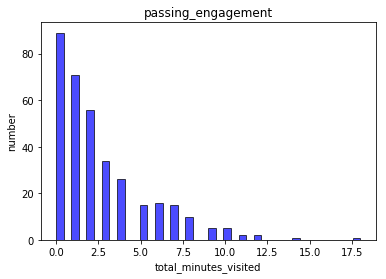

In [140]:
import matplotlib.pyplot as plt
data3 = group_sum_.values()
plt.hist(data3 , bins=40, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)
# 显示横轴标签
plt.xlabel("total_minutes_visited")
# 显示纵轴标签
plt.ylabel("number")
# 显示图标题
plt.title("passing_engagement")
plt.show()

Summary from the passing_engagement based on the total lessons completed
Mean: 2.043276661514683
Standard deviation: 3.1428602763006612
Minimum: 0
Maximum: 36




D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


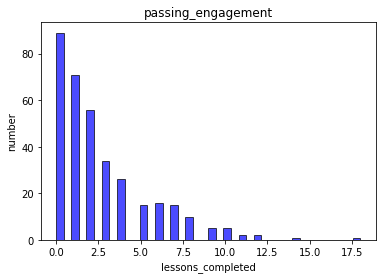

In [150]:
group_by_account_ = group_by_account_key(passing_engagement, 'lessons_completed')
group_sum_lessons_passing = group_sum(group_by_account_)
report(group_sum_lessons_passing ,'Summary from the passing_engagement based on the total lessons completed')
data3 = group_sum_.values()
plt.hist(data3 , bins=40, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)
# 显示横轴标签
plt.xlabel("lessons_completed")
# 显示纵轴标签
plt.ylabel("number")
# 显示图标题
plt.title("passing_engagement")
plt.show()

Summary from the passing_engagement based on the total num_courses_visited
Mean: 4.777434312210201
Standard deviation: 3.6454011893707445
Minimum: 0
Maximum: 25




D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


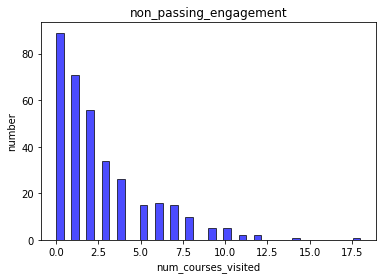

In [141]:
group_by_account_ = group_by_account_key(passing_engagement, 'num_courses_visited')
group_sum_courses_passing = group_sum(group_by_account_)
report(group_sum_courses_passing ,'Summary from the passing_engagement based on the total num_courses_visited')
data3 = group_sum_.values()
plt.hist(data3 , bins=40, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)
# 显示横轴标签
plt.xlabel("num_courses_visited")
# 显示纵轴标签
plt.ylabel("number")
# 显示图标题
plt.title("non_passing_engagement")
plt.show()

Summary from the mon_passing_engagement based on the total minutes visited
Mean: 145.39934186498854
Standard deviation: 268.97150372555103
Minimum: 0.0
Maximum: 1768.5227493




D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


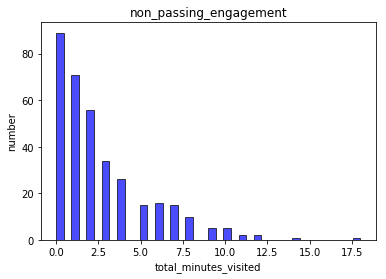

In [142]:
group_by_account_ = group_by_account_key(non_passing_engagement, 'total_minutes_visited')
group_sum_minutes_non_passing = group_sum(group_by_account_)
report(group_sum_minutes_non_passing ,'Summary from the mon_passing_engagement based on the total minutes visited')
data3 = group_sum_.values()
plt.hist(data3 , bins=40, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)
# 显示横轴标签
plt.xlabel("total_minutes_visited")
# 显示纵轴标签
plt.ylabel("number")
# 显示图标题
plt.title("non_passing_engagement")
plt.show()

Summary from the non_ passing_engagement based on the total lessons completed
Mean: 0.867816091954023
Standard deviation: 2.5483370395862583
Minimum: 0
Maximum: 27




D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


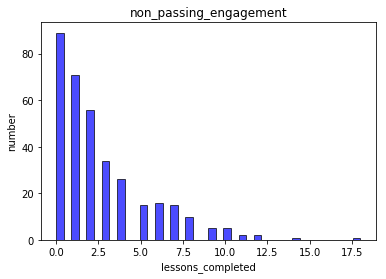

In [143]:
group_by_account_ = group_by_account_key(non_passing_engagement, 'lessons_completed')
group_sum_lessons_non_passing = group_sum(group_by_account_)
report(group_sum_lessons_non_passing ,'Summary from the non_ passing_engagement based on the total lessons completed')
data3 = group_sum_.values()
plt.hist(data3 , bins=40, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)
# 显示横轴标签
plt.xlabel("lessons_completed")
# 显示纵轴标签
plt.ylabel("number")
# 显示图标题
plt.title("non_passing_engagement")
plt.show()

Summary from the non_passing_engagement based on the total num_courses_visited
Mean: 2.6379310344827585
Standard deviation: 2.874970919565484
Minimum: 0
Maximum: 18




D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


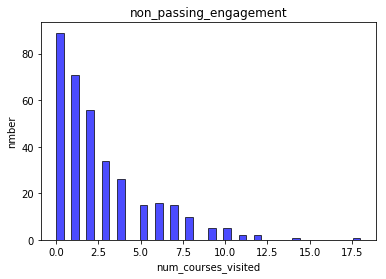

In [144]:
group_by_account_ = group_by_account_key(non_passing_engagement, 'num_courses_visited')
group_sum_courses_non_passing = group_sum(group_by_account_)
report(group_sum_courses_non_passing ,'Summary from the non_passing_engagement based on the total num_courses_visited')
data3 = group_sum_.values()
plt.hist(data3 , bins=40, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)
# 显示横轴标签
plt.xlabel("num_courses_visited")
# 显示纵轴标签
plt.ylabel("nmber")
# 显示图标题
plt.title("non_passing_engagement")
plt.show()

# the days visited differ for students who pass  vs. students who don't

number days visited for who passing
Mean: 3.42967542503864
Standard deviation: 2.2129834086555964
Minimum: 0
Maximum: 7




D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


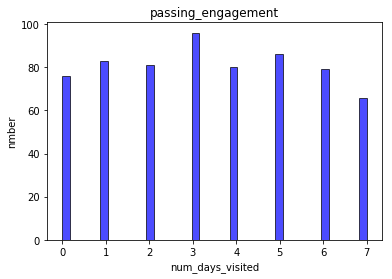

In [136]:
import copy
days_visited_passing=group_by_account_key(passing_engagement,'num_courses_visited')
days_visited_passing_bool=copy.deepcopy(days_visited_passing)
for index,my_list in days_visited_passing.items():
    array_=np.asarray(my_list)
    my_bool_array=array_>0
#     my_bool_list=list(my_bool_array)
    days_visited_passing_bool[index]=sum(my_bool_array)
report(days_visited_passing_bool,"number days visited for who passing")
data3 = days_visited_passing_bool.values()
plt.hist(data3 , bins=40, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)
# 显示横轴标签
plt.xlabel("num_days_visited")
# 显示纵轴标签
plt.ylabel("nmber")
# 显示图标题
plt.title("passing_engagement")
plt.show()

number days visited for who do not passing
Mean: 3.42967542503864
Standard deviation: 2.2129834086555964
Minimum: 0
Maximum: 7




D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


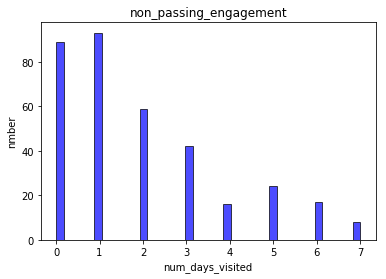

dict

In [148]:
import copy
days_visited_non_passing=group_by_account_key(non_passing_engagement,'num_courses_visited')
days_visited_non_passing_bool=copy.deepcopy(days_visited_non_passing)
for index,my_list in days_visited_non_passing.items():
    array_=np.asarray(my_list)
    my_bool_array=array_>0
#     my_bool_list=list(my_bool_array)
    days_visited_non_passing_bool[index]=sum(my_bool_array)
report(days_visited_passing_bool,"number days visited for who do not passing")
data3 = days_visited_non_passing_bool.values()
plt.hist(data3 , bins=40, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)
# 显示横轴标签
plt.xlabel("num_days_visited")
# 显示纵轴标签
plt.ylabel("nmber")
# 显示图标题
plt.title("non_passing_engagement")
plt.show()


# KNeighborsClassifier


In [165]:
passing_engagement_dataset=np.zeros((647,4),dtype='float')
non_passing_engagement_dataset=np.zeros((348,4),dtype='float')
Y=np.zeros((647+348,),dtype='bool')
i=0
j=0

 
for each in group_sum_courses_passing.keys():
    passing_engagement_dataset[i][0]=group_sum_minutes_passing[each]
    passing_engagement_dataset[i][1]=group_sum_lessons_passing[each]
    passing_engagement_dataset[i][2]=group_sum_courses_passing[each]
    passing_engagement_dataset[i][3]=days_visited_passing_bool[each]
    Y[i]=True
    i+=1
    
for each in group_sum_courses_non_passing.keys():
    non_passing_engagement_dataset[j][0]=group_sum_minutes_non_passing[each]
    non_passing_engagement_dataset[j][1]=group_sum_lessons_non_passing[each]
    non_passing_engagement_dataset[j][2]=group_sum_courses_non_passing[each]
    non_passing_engagement_dataset[j][3]=days_visited_non_passing_bool[each]
    Y[i+j]=False
    j+=1

passing_engagement

    




[OrderedDict([('utc_date', datetime.datetime(2015, 1, 9, 0, 0)),
              ('num_courses_visited', 1),
              ('total_minutes_visited', 11.6793745),
              ('lessons_completed', 0),
              ('projects_completed', 0),
              ('account_key', '0')]),
 OrderedDict([('utc_date', datetime.datetime(2015, 1, 10, 0, 0)),
              ('num_courses_visited', 2),
              ('total_minutes_visited', 37.28488733),
              ('lessons_completed', 0),
              ('projects_completed', 0),
              ('account_key', '0')]),
 OrderedDict([('utc_date', datetime.datetime(2015, 1, 11, 0, 0)),
              ('num_courses_visited', 2),
              ('total_minutes_visited', 53.63374633),
              ('lessons_completed', 0),
              ('projects_completed', 0),
              ('account_key', '0')]),
 OrderedDict([('utc_date', datetime.datetime(2015, 1, 12, 0, 0)),
              ('num_courses_visited', 1),
              ('total_minutes_visited', 33.48926967

In [166]:
from numpy import *
X=concatenate((passing_engagement_dataset,non_passing_engagement_dataset),axis=0)

X

array([[494.8804961 ,   1.        ,   9.        ,   7.        ],
       [ 18.57638467,   0.        ,   2.        ,   2.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        ,   0.        ],
       [ 12.18271117,   1.        ,   2.        ,   2.        ],
       [  9.77147383,   0.        ,   2.        ,   2.        ]])

In [168]:
from sklearn.model_selection import train_test_split,cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=14)
from sklearn.neighbors import KNeighborsClassifier 
estimator = KNeighborsClassifier()
estimator.fit(X_train, y_train)
y_predicted = estimator.predict(X_test) 
accuracy = np.mean(y_test == y_predicted) * 100

#cross invalidation
print("The accuracy is {0:.1f}%".format(accuracy))
scores = cross_val_score(estimator, X, Y, scoring='accuracy') 
average_accuracy = np.mean(scores) * 100 
print("The average accuracy is {0:.1f}%".format(average_accuracy))

The accuracy is 57.0%
The average accuracy is 68.1%


D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [169]:
avg_scores = [] 
all_scores = [] 
parameter_values = list(range(1, 21)) # Include 20 
for n_neighbors in parameter_values: 
    estimator = KNeighborsClassifier(n_neighbors=n_neighbors) 
    scores = cross_val_score(estimator, X, Y, scoring='accuracy')
    avg_scores.append(np.mean(scores)) 
    all_scores.append(scores)
all_scores

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in v

[array([0.63253012, 0.60843373, 0.62839879]),
 array([0.59337349, 0.53915663, 0.58006042]),
 array([0.64759036, 0.65060241, 0.67673716]),
 array([0.6686747 , 0.61144578, 0.64350453]),
 array([0.68373494, 0.65662651, 0.70392749]),
 array([0.6686747 , 0.63554217, 0.68882175]),
 array([0.6686747 , 0.64457831, 0.69486405]),
 array([0.65662651, 0.65361446, 0.68277946]),
 array([0.65361446, 0.65060241, 0.66465257]),
 array([0.63855422, 0.65662651, 0.66163142]),
 array([0.64457831, 0.65662651, 0.66163142]),
 array([0.65060241, 0.65060241, 0.65256798]),
 array([0.65662651, 0.66566265, 0.65256798]),
 array([0.66566265, 0.68072289, 0.64652568]),
 array([0.65662651, 0.67771084, 0.65256798]),
 array([0.65662651, 0.68072289, 0.64652568]),
 array([0.65060241, 0.68373494, 0.64350453]),
 array([0.65361446, 0.68373494, 0.63746224]),
 array([0.65662651, 0.69578313, 0.65256798]),
 array([0.65662651, 0.68975904, 0.64350453])]

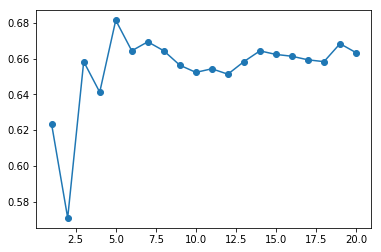

In [170]:
%matplotlib inline
from matplotlib import pyplot as plt 
plt.plot(parameter_values, avg_scores, '-o')

In [160]:
# from sklearn.preprocessing import MinMaxScaler
# X_transformed = MinMaxScaler().fit_transform(X)
# estimator = KNeighborsClassifier() 
# transformed_scores = cross_val_score(estimator, X_transformed, Y, 
#  scoring='accuracy') 
# print("The average accuracy for is {0:.1f}%".format(np.mean(transformed_scores) * 100))